## solved by - Sanjana Pal

In [1]:
# importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe

In [2]:
# load data
df = pd.read_csv("Loan Default Dataset -3.csv")

In [3]:
df

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C16505,0,41,M,91519.92,SELF-EMP,38,41-45,926,15
1,C17241,0,52,M,117288.96,SAL,17,>50,768,13
2,C18802,0,31,F,259827.44,SENP,8,31-35,816,5
3,C19289,0,45,F,26677.55,PROF,14,41-45,353,18
4,C14028,0,39,F,43440.31,SENP,1,36-40,751,31
...,...,...,...,...,...,...,...,...,...,...
19995,C4478,0,23,F,67612.33,SENP,20,<25,164,27
19996,C3721,0,34,F,472365.27,PROF,8,31-35,124,1
19997,C7547,0,42,M,100642.27,SAL,4,41-45,263,1
19998,C13571,0,36,M,29950.82,SENP,10,36-40,345,31


In [4]:
# describing the data
df.describe()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,0.086650,38.396200,1.461813e+05,16.653050,557.136050,15.344100
std,0.281329,9.600179,1.698125e+05,12.977704,260.521453,8.952128
min,0.000000,21.000000,0.000000e+00,0.000000,100.000000,1.000000
25%,0.000000,30.000000,2.373692e+04,7.000000,333.000000,8.000000
50%,0.000000,38.000000,7.975574e+04,13.000000,560.000000,16.000000
75%,0.000000,47.000000,2.173106e+05,22.000000,784.000000,23.000000
max,1.000000,55.000000,1.246967e+06,50.000000,999.000000,31.000000


In [5]:
# shape of dataset
df.shape

(20000, 10)

In [6]:
# drop custid column
df.drop('Cust_ID',axis=1,inplace=True)

In [7]:
# find duplicate
# keep last mean keeping last rows as unique and others are duplicate
df[df.duplicated(keep='last')]

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
1295,0,43,M,7687.21,SAL,35,41-45,997,12
3607,0,40,F,49540.88,SENP,19,36-40,200,18
3887,1,52,M,5033.61,SAL,2,>50,657,6


In [8]:
# drop duplicate values
df.drop_duplicates()

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,0,41,M,91519.92,SELF-EMP,38,41-45,926,15
1,0,52,M,117288.96,SAL,17,>50,768,13
2,0,31,F,259827.44,SENP,8,31-35,816,5
3,0,45,F,26677.55,PROF,14,41-45,353,18
4,0,39,F,43440.31,SENP,1,36-40,751,31
...,...,...,...,...,...,...,...,...,...
19995,0,23,F,67612.33,SENP,20,<25,164,27
19996,0,34,F,472365.27,PROF,8,31-35,124,1
19997,0,42,M,100642.27,SAL,4,41-45,263,1
19998,0,36,M,29950.82,SENP,10,36-40,345,31


In [9]:
# check the datatype of all the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Target          20000 non-null  int64  
 1   Age             20000 non-null  int64  
 2   Gender          20000 non-null  object 
 3   Balance         20000 non-null  float64
 4   Occupation      20000 non-null  object 
 5   No_OF_CR_TXNS   20000 non-null  int64  
 6   AGE_BKT         20000 non-null  object 
 7   SCR             20000 non-null  int64  
 8   Holding_Period  20000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.4+ MB


In [10]:
# values in age_bkt
df['AGE_BKT'].unique()

array(['41-45', '>50', '31-35', '36-40', '26-30', '46-50', '<25'],
      dtype=object)

In [11]:
df['Occupation'].unique()

array(['SELF-EMP', 'SAL', 'SENP', 'PROF'], dtype=object)

In [12]:
# let convert object column into categorical
for features in df.columns:
    if df[features].dtype =='object':
        df[features] = pd.Categorical(df[features])

In [13]:
df.head(10)

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,0,41,M,91519.92,SELF-EMP,38,41-45,926,15
1,0,52,M,117288.96,SAL,17,>50,768,13
2,0,31,F,259827.44,SENP,8,31-35,816,5
3,0,45,F,26677.55,PROF,14,41-45,353,18
4,0,39,F,43440.31,SENP,1,36-40,751,31
5,0,45,M,403324.49,SENP,11,41-45,364,2
6,1,33,M,245500.00,SAL,24,31-35,166,9
7,0,26,F,464931.92,SELF-EMP,18,26-30,448,28
8,0,38,M,49257.03,SAL,19,36-40,237,5
9,1,44,M,10791.71,SELF-EMP,17,41-45,678,3


In [14]:
# object column are converted into category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Target          20000 non-null  int64   
 1   Age             20000 non-null  int64   
 2   Gender          20000 non-null  category
 3   Balance         20000 non-null  float64 
 4   Occupation      20000 non-null  category
 5   No_OF_CR_TXNS   20000 non-null  int64   
 6   AGE_BKT         20000 non-null  category
 7   SCR             20000 non-null  int64   
 8   Holding_Period  20000 non-null  int64   
dtypes: category(3), float64(1), int64(5)
memory usage: 996.9 KB


In [15]:
# get value count foe every column
print(df.Target.value_counts())
print(df.Age.value_counts())
print(df.Gender.value_counts())
print(df.Balance.value_counts())
print(df.Occupation.value_counts())
print(df.No_OF_CR_TXNS.value_counts())
print(df.AGE_BKT.value_counts())
print(df.SCR.value_counts())
print(df.Holding_Period.value_counts())

0    18267
1     1733
Name: Target, dtype: int64
32    764
30    760
28    748
31    712
33    684
35    672
29    672
41    672
43    660
36    660
34    656
55    640
53    640
27    612
26    612
52    600
51    592
45    592
37    568
44    560
54    548
47    548
46    548
25    544
50    536
40    536
42    532
38    504
39    488
49    472
48    428
24    396
23    384
22    248
21    212
Name: Age, dtype: int64
M    14279
F     5525
O      196
Name: Gender, dtype: int64
225555.00    216
245500.00    200
249809.73    104
226789.00     84
0.00          76
            ... 
15207.96       4
324851.98      4
434060.43      4
164666.68      4
74396.74       4
Name: Balance, Length: 4798, dtype: int64
SAL         5839
PROF        5463
SENP        5332
SELF-EMP    3366
Name: Occupation, dtype: int64
12    833
10    808
11    794
18    780
14    771
9     756
8     749
7     711
6     705
2     704
3     703
17    701
13    682
5     679
15    667
0     652
4     651
20    644
19    610

In [16]:
df

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,0,41,M,91519.92,SELF-EMP,38,41-45,926,15
1,0,52,M,117288.96,SAL,17,>50,768,13
2,0,31,F,259827.44,SENP,8,31-35,816,5
3,0,45,F,26677.55,PROF,14,41-45,353,18
4,0,39,F,43440.31,SENP,1,36-40,751,31
...,...,...,...,...,...,...,...,...,...
19995,0,23,F,67612.33,SENP,20,<25,164,27
19996,0,34,F,472365.27,PROF,8,31-35,124,1
19997,0,42,M,100642.27,SAL,4,41-45,263,1
19998,0,36,M,29950.82,SENP,10,36-40,345,31


In [17]:
# replace the categorical values 
replacestruc = {
         "AGE_BKT": {'<25':0,'>25':1,'26-30':2,'31-35':3,'36-40':4,'41-45':5,'46-50':6,'>50':7},
    'Occupation':{'SELF-EMP':1,'SAL':2,'SENP':3,'PROF':4}
}

In [18]:
df = df.replace(replacestruc)
df

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,0,41,M,91519.92,1,38,5,926,15
1,0,52,M,117288.96,2,17,7,768,13
2,0,31,F,259827.44,3,8,3,816,5
3,0,45,F,26677.55,4,14,5,353,18
4,0,39,F,43440.31,3,1,4,751,31
...,...,...,...,...,...,...,...,...,...
19995,0,23,F,67612.33,3,20,0,164,27
19996,0,34,F,472365.27,4,8,3,124,1
19997,0,42,M,100642.27,2,4,5,263,1
19998,0,36,M,29950.82,3,10,4,345,31


In [19]:
# convert categories into a different column
df = pd.get_dummies(data=df,columns=['Gender'])
df

,Target,Age,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period,Gender_F,Gender_M,Gender_O
0,0,41,91519.92,1,38,5,926,15,0,1,0
1,0,52,117288.96,2,17,7,768,13,0,1,0
2,0,31,259827.44,3,8,3,816,5,1,0,0
3,0,45,26677.55,4,14,5,353,18,1,0,0
4,0,39,43440.31,3,1,4,751,31,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,0,23,67612.33,3,20,0,164,27,1,0,0
19996,0,34,472365.27,4,8,3,124,1,1,0,0
19997,0,42,100642.27,2,4,5,263,1,0,1,0
19998,0,36,29950.82,3,10,4,345,31,0,1,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Target          20000 non-null  int64   
 1   Age             20000 non-null  int64   
 2   Balance         20000 non-null  float64 
 3   Occupation      20000 non-null  category
 4   No_OF_CR_TXNS   20000 non-null  int64   
 5   AGE_BKT         20000 non-null  category
 6   SCR             20000 non-null  int64   
 7   Holding_Period  20000 non-null  int64   
 8   Gender_F        20000 non-null  uint8   
 9   Gender_M        20000 non-null  uint8   
 10  Gender_O        20000 non-null  uint8   
dtypes: category(2), float64(1), int64(5), uint8(3)
memory usage: 1.0 MB


# Visualization

- Visualization plays an important role in data science,it is an pictorial way to represent the data.As we know raw data is  difficult to understand but the picture are easy to understand.

<AxesSubplot:>

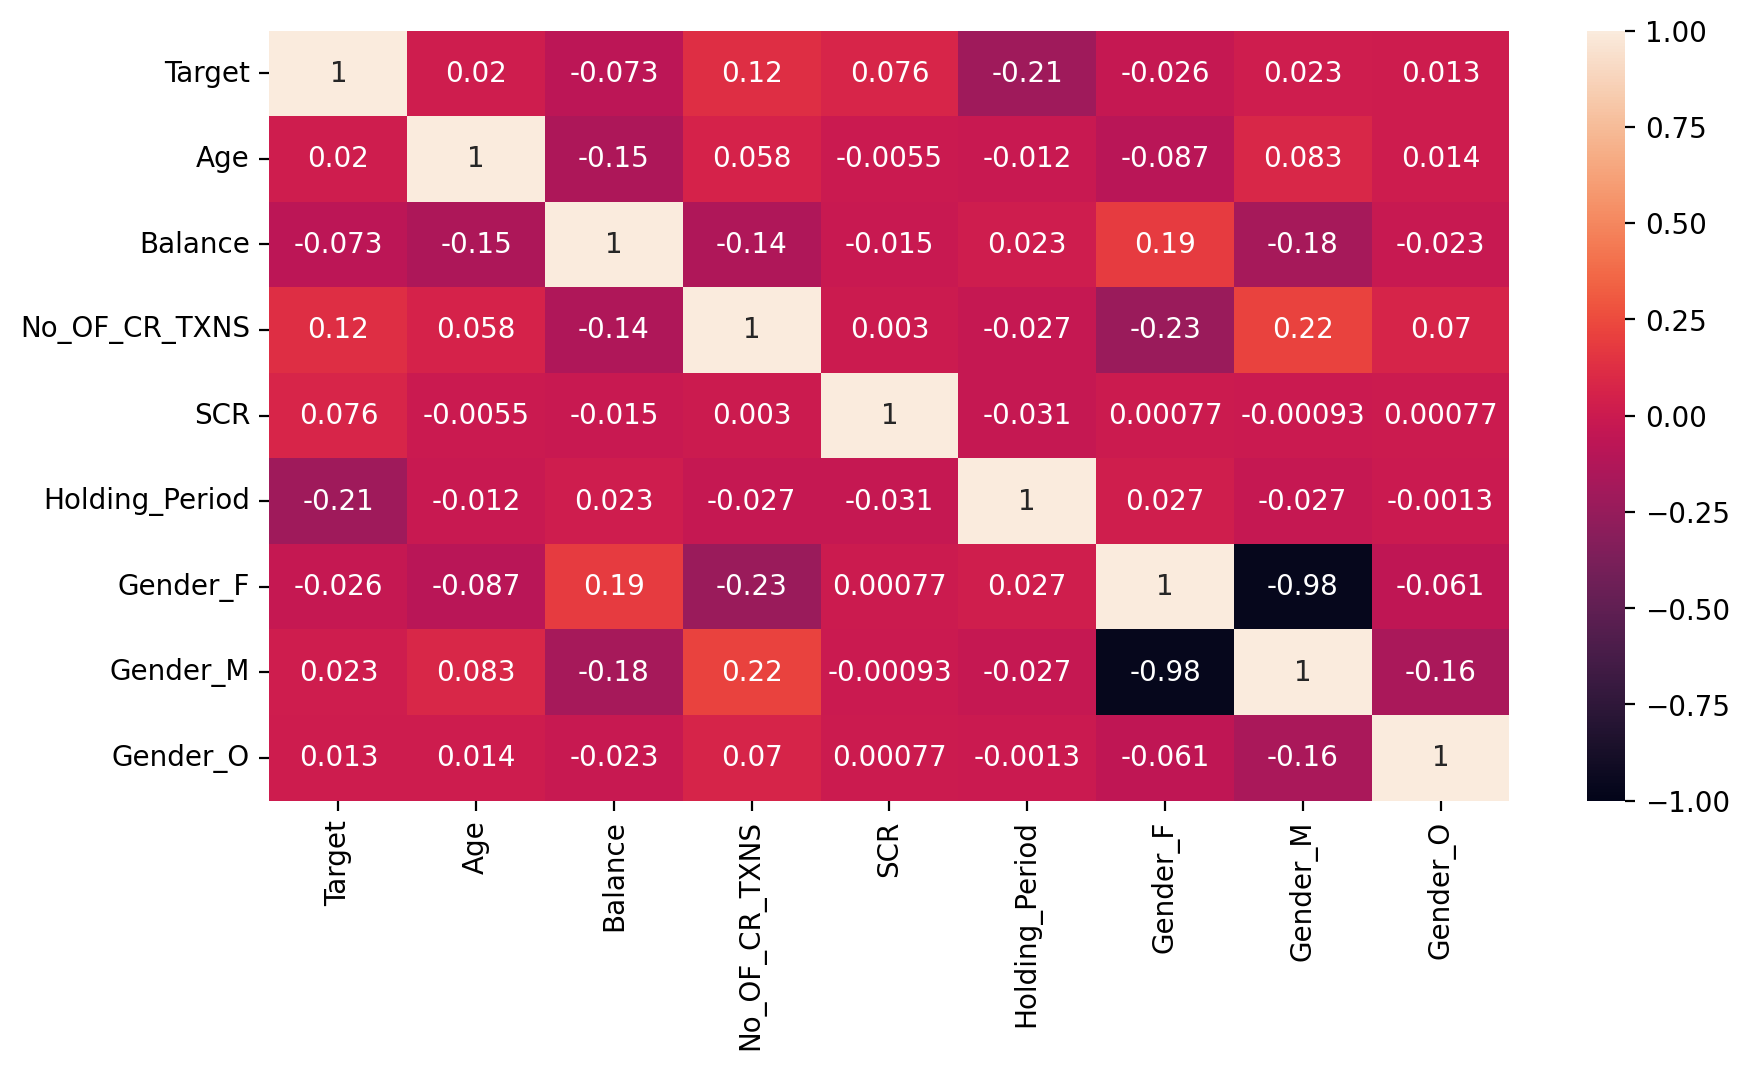

In [21]:
# correlation between the column
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=200
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

- we can observe ,target variable have moderate correlation with balace and scr column

<AxesSubplot:>

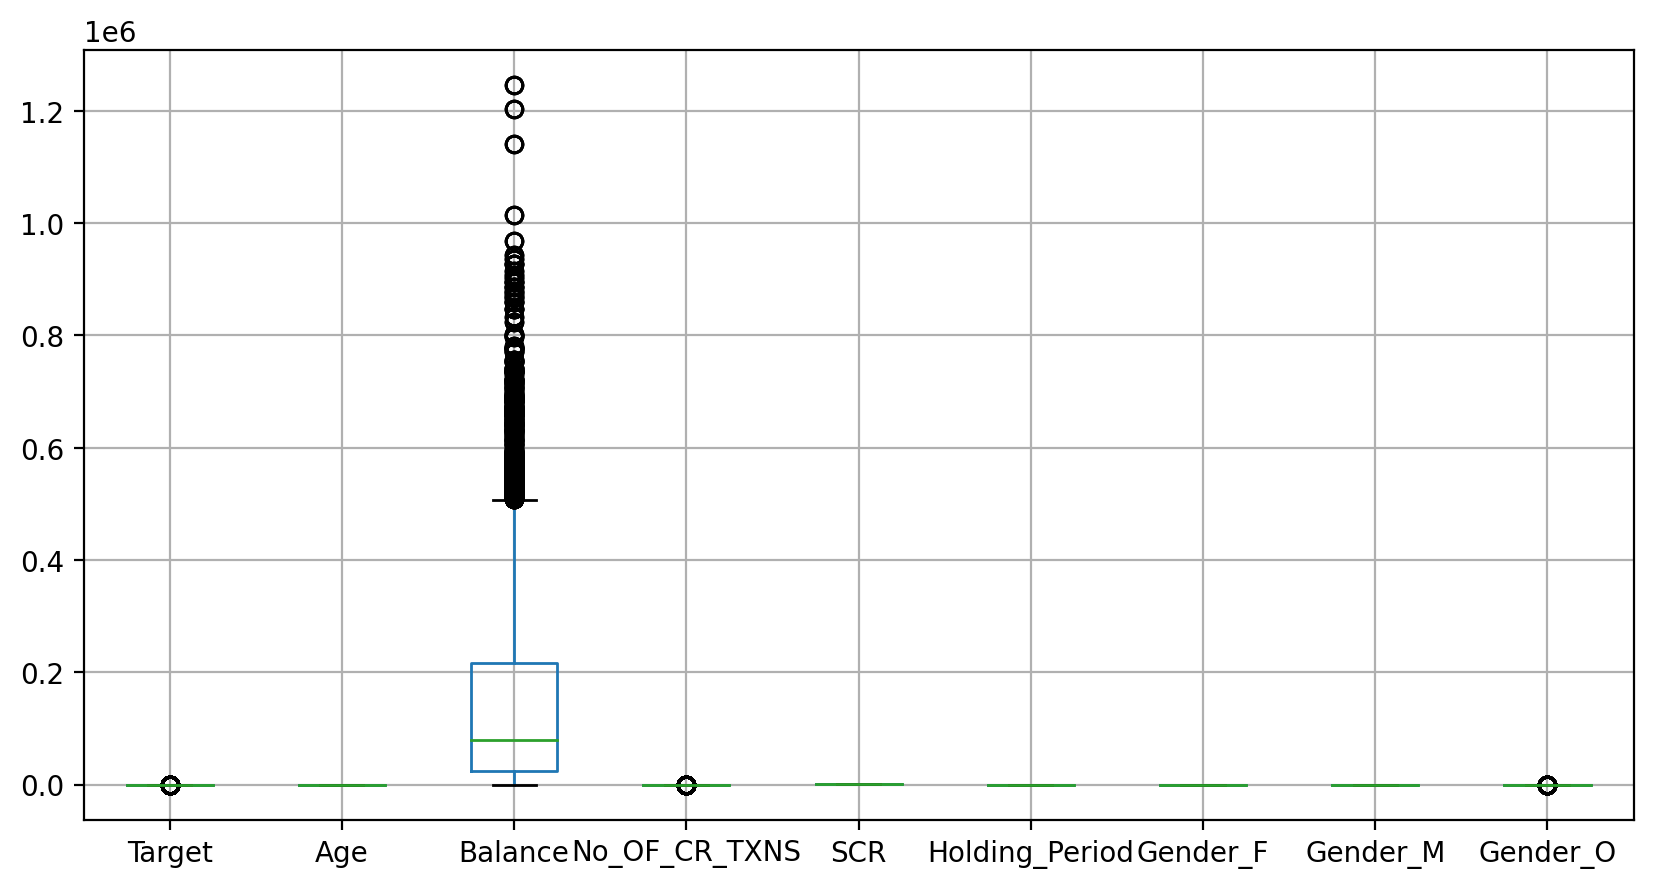

In [22]:
df.boxplot()

- by observing the boxplot,we can say that balance column contain outlier.

In [23]:
# value_count of target column
df['Target'].value_counts()

0    18267
1     1733
Name: Target, dtype: int64

C:\Users\sanjana pal\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

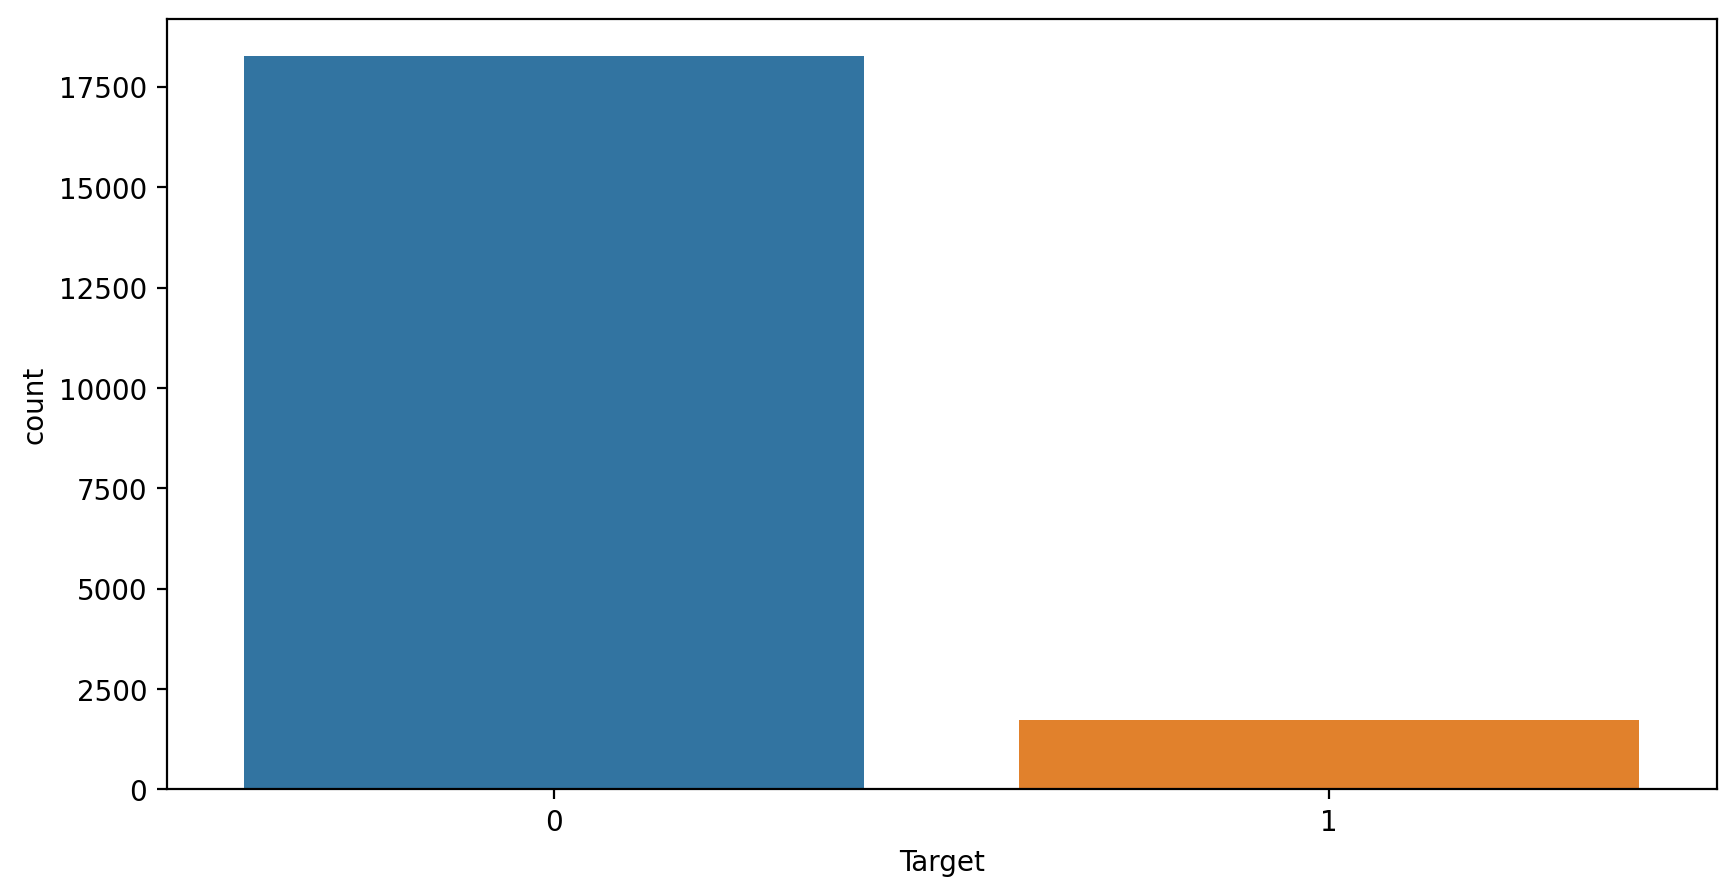

In [24]:
sns.countplot(df['Target'])

- diagram clearly shows that it is unbalance data,we have to balance the data to find the correct prediction.We are using stratify in train test split which used to balance the data,stratify balace the 0 & 1 values.

# Split data

- Splitting the data is crucial step ,data is divided into training and testing part ,Model train on training data and model evaluate on testing data.

In [25]:
# importing some libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [26]:
# divide the data into x and y
x = df.drop('Target',axis=1)
y = df['Target']

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [28]:
print("The Size of xtrain:",xtrain.shape)
print("The Size of xtest:",xtest.shape)
print("The Size of ytrain:",ytrain.shape)
print("The Size of xtest:",ytest.shape)

The Size of xtrain: (14000, 10)
The Size of xtest: (6000, 10)
The Size of ytrain: (14000,)
The Size of xtest: (6000,)


# Build Decision Tree model

In [29]:
# create decision tree model
dt = DecisionTreeClassifier(criterion='gini',random_state=1)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=1)

# Scoring for Decision Tree

In [32]:
# score training and testing accuracy
y = dt.predict(xtest)
print(dt.score(xtrain,ytrain))
print(dt.score(xtest,ytest))

1.0
0.8556666666666667


- Training accuracy is 1.0 and Testing accuracy is 0.855 ,which clearly shows that model is overfitted.overfitting mean,model perform very well on training data but it is failed to perform on testing data.

In [38]:
from sklearn.tree import plot_tree
from sklearn import tree

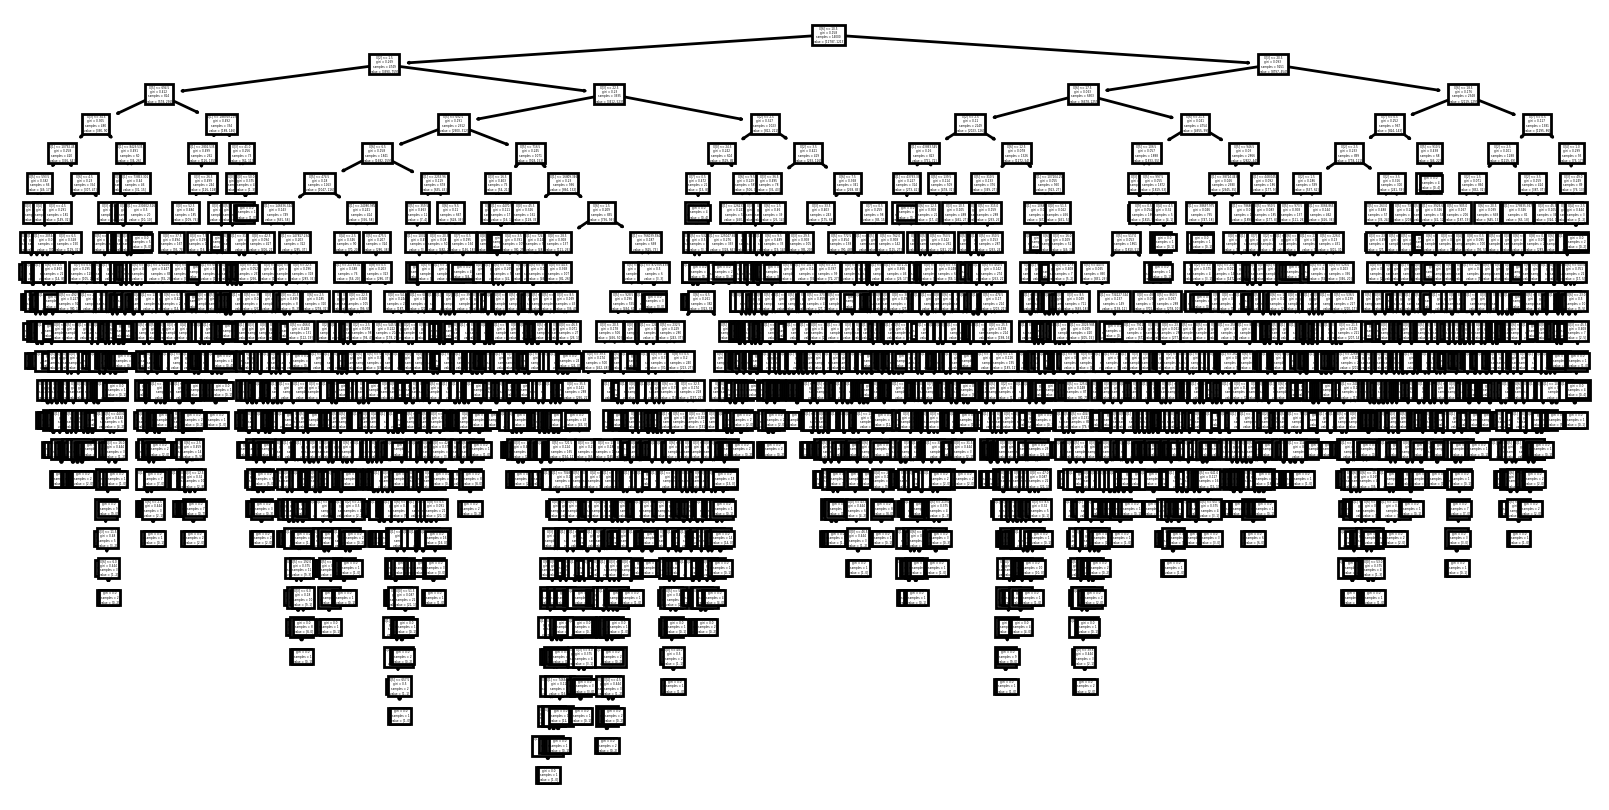

In [40]:
tree.plot_tree(dt)
plt.show()

# Reduce overfiting using pruning

- In Decision Tree pruning is best method to reduced overfitting,it cut the branches and decide the maximum depth of the tree.

In [42]:
# pruning
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
dt2.fit(xtrain,ytrain)
print(dt2.score(xtrain,ytrain))
print(dt2.score(xtest,ytest))

0.9133571428571429
0.9133333333333333


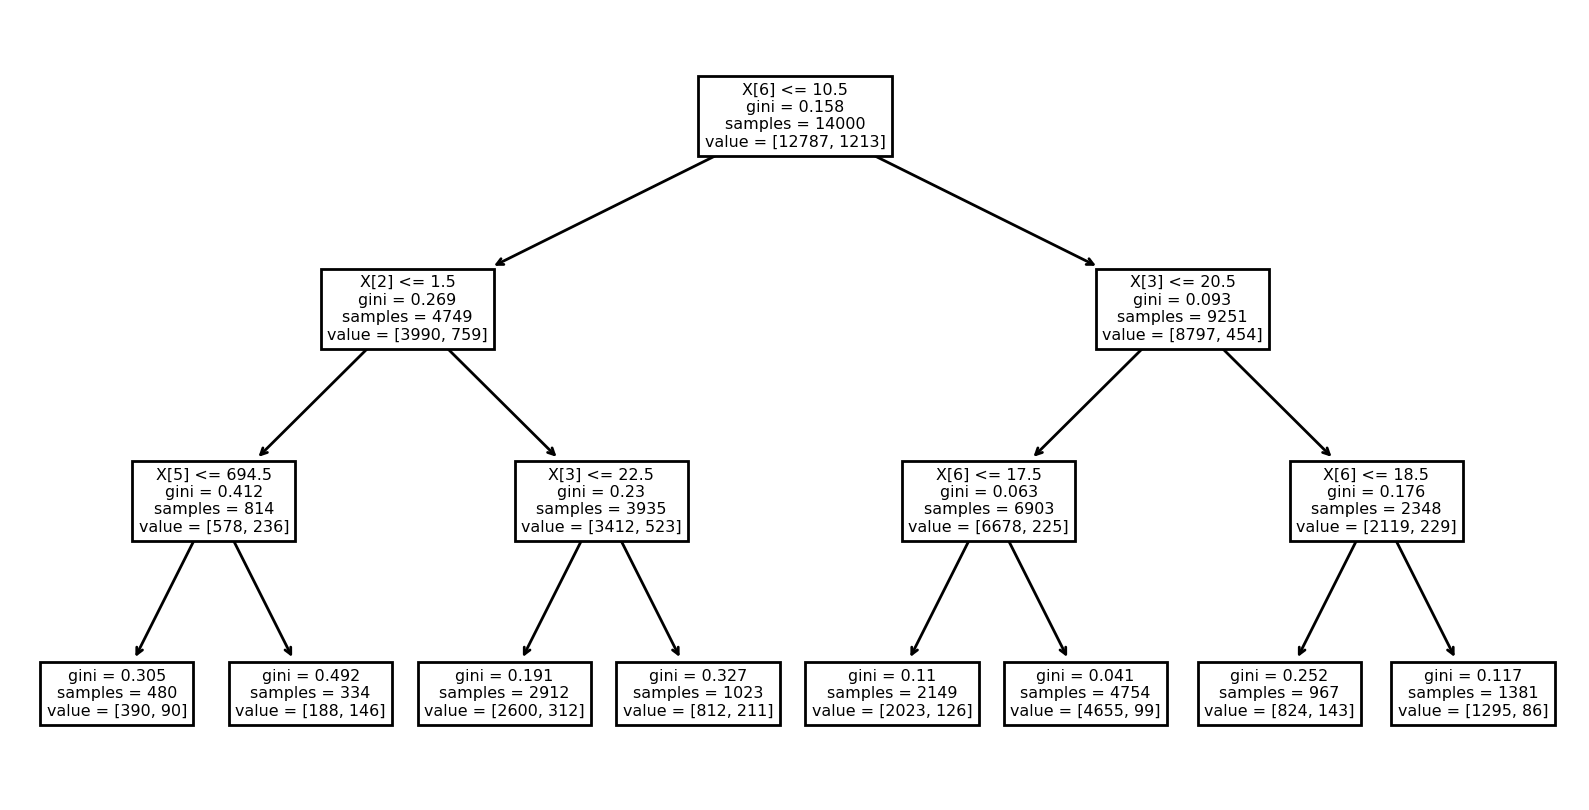

In [43]:
tree.plot_tree(dt2)
plt.show()

In [44]:
# feature importance
dt2.feature_importances_

array([0.        , 0.        , 0.18789923, 0.16751244, 0.        ,
       0.13867861, 0.50590973, 0.        , 0.        , 0.        ])

In [45]:
print(pd.DataFrame(dt2.feature_importances_,columns=['IMP'],index=xtrain.columns))

                     IMP
Age             0.000000
Balance         0.000000
Occupation      0.187899
No_OF_CR_TXNS   0.167512
AGE_BKT         0.000000
SCR             0.138679
Holding_Period  0.505910
Gender_F        0.000000
Gender_M        0.000000
Gender_O        0.000000


In [46]:
from sklearn.metrics import confusion_matrix

In [48]:
# predict the xtest
y = dt2.predict(xtest)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

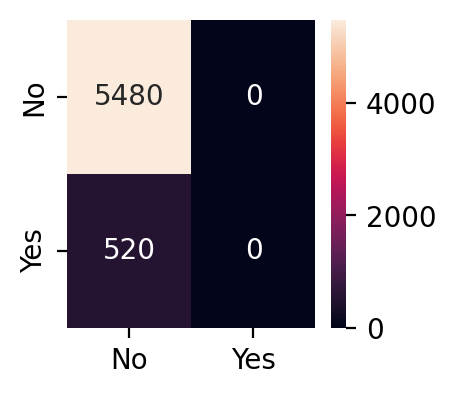

In [54]:
# confusion matrix is to evaluate model
cm = confusion_matrix(ytest, y, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (2,2))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()